In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from collections import Counter
from datetime import date
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
### Part1 EDA ###

## Numerical Summary ##

# Read in data
df = pd.read_csv("marketing_campaign.csv")

In [3]:
# Overall shape of the data frame
df.shape
# (2240,29) there are 2240 rows * 29 columns in the data set

(2240, 29)

In [4]:
# Describe the data set before data processing
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
## Feature Processing ##

##df["Z_CostContact"].head(100)
##df["Z_Revenue"].head(100)
# Remove ID, Z_CostContact and Z_Revenue because they are redundant
df = df.drop(df[["ID", "Z_CostContact","Z_Revenue"]],1)
# row*col = 2240*26

C:\Users\hp\AppData\Local\Temp\ipykernel_2284\3375479496.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df[["ID", "Z_CostContact","Z_Revenue"]],1)


In [8]:
# Add a new feature namely "Spending" - total spending for products
df["Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Add feature “Age” - customer’s age
df["Age"] = 2021 - df["Year_Birth"]
# "Age" will replace "Year_Birth", since we have Age already, Year_Birth is replicate
df = df.drop("Year_Birth",1)

# Add “Num_Children” - total number of children/teenagers at home
df["Num_Children"] = df["Kidhome"] + df["Teenhome"]

C:\Users\hp\AppData\Local\Temp\ipykernel_2284\753154723.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Year_Birth",1)


In [9]:
# Add "Enrollment_Time" - how long the customer has been in the company
# "Enrollment_Time" will replace "Dt_Customer"
df["Enrollment_Time"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True, format='%d-%m-%Y')
enrol = df["Enrollment_Time"].dt.date.apply(lambda z: (date.today()-z)).dt.days
df["Enrollment_Time"] = pd.to_numeric(enrol, downcast = 'integer')/30
df = df.drop("Dt_Customer",1)

# Update feature Marital_Status, we let:
# Single = Divorced, Widow, Alone, Absurd, YOLO, Single
# Pair = Together, Married
df.Marital_Status = df.Marital_Status.replace({"Divorced": "Single",
                                               "Widow": "Single",
                                               "Alone": "Single",
                                               "Absurd": "Single",
                                               "YOLO": "Single",
                                               "Together": "Pair",
                                               "Married": "Pair"})


# check columns
df.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_2284\148936594.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Dt_Customer",1)


Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Spending', 'Age', 'Num_Children',
       'Enrollment_Time'],
      dtype='object')

In [10]:
# Get a list of categorical features
cat = (df.dtypes == "object")
cat_cols = list(cat[cat].index)
print("Categorical Features:"+str(cat_cols))
# Categorical features: Education, Marital_Status
# The rest of the 27 features are numerical 

Categorical Features:['Education', 'Marital_Status']


In [11]:
print(df["Education"].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [12]:
print(df["Marital_Status"].value_counts())

Pair      1444
Single     796
Name: Marital_Status, dtype: int64


In [13]:
df.info()
# dtypes: float64(2), int64(24), object(2)
# => 2 floating data, 24 integers, 2 categorical data
# There are missingness in feature Income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [14]:
# Data set description after processing
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,1617,64,0,124.133333
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,27,67,2,105.800000
2,Graduation,Pair,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,776,56,0,112.433333
3,Graduation,Pair,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,53,37,1,106.666667
4,PhD,Pair,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,422,40,1,107.400000


In [15]:
df.describe()
# [8 rows x 26 columns],26 numeric features and 2 categorical features

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,605.798214,52.194196,0.950446,113.819405
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,602.249288,11.984069,0.751803,6.737417
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,25.000000,0.000000,102.033333
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,44.000000,0.000000,108.058333
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,51.000000,1.000000,113.883333
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,62.000000,1.000000,119.666667
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,128.000000,3.000000,125.333333


In [16]:
## Graphing Summary ## 

df_cat = ["Spending","Income","Recency","Age","Num_Children","Enrollment_Time","Education","Marital_Status"]
df_mnt = ["Spending","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
df_place = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]
df_camp = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]


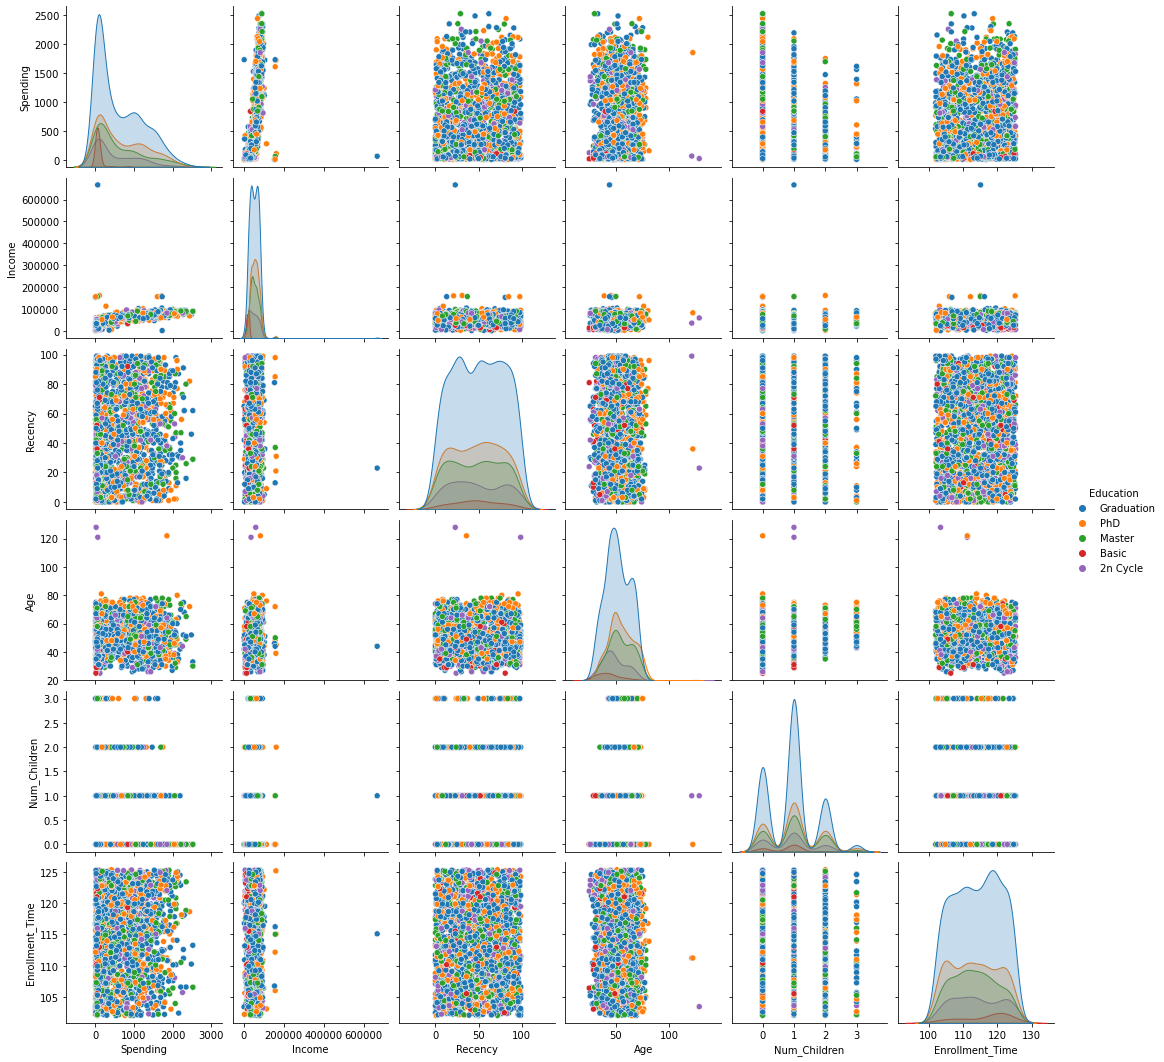

In [17]:
# Relationships between variables in df_cat
sns.pairplot(df[df_cat], hue="Education") # large images

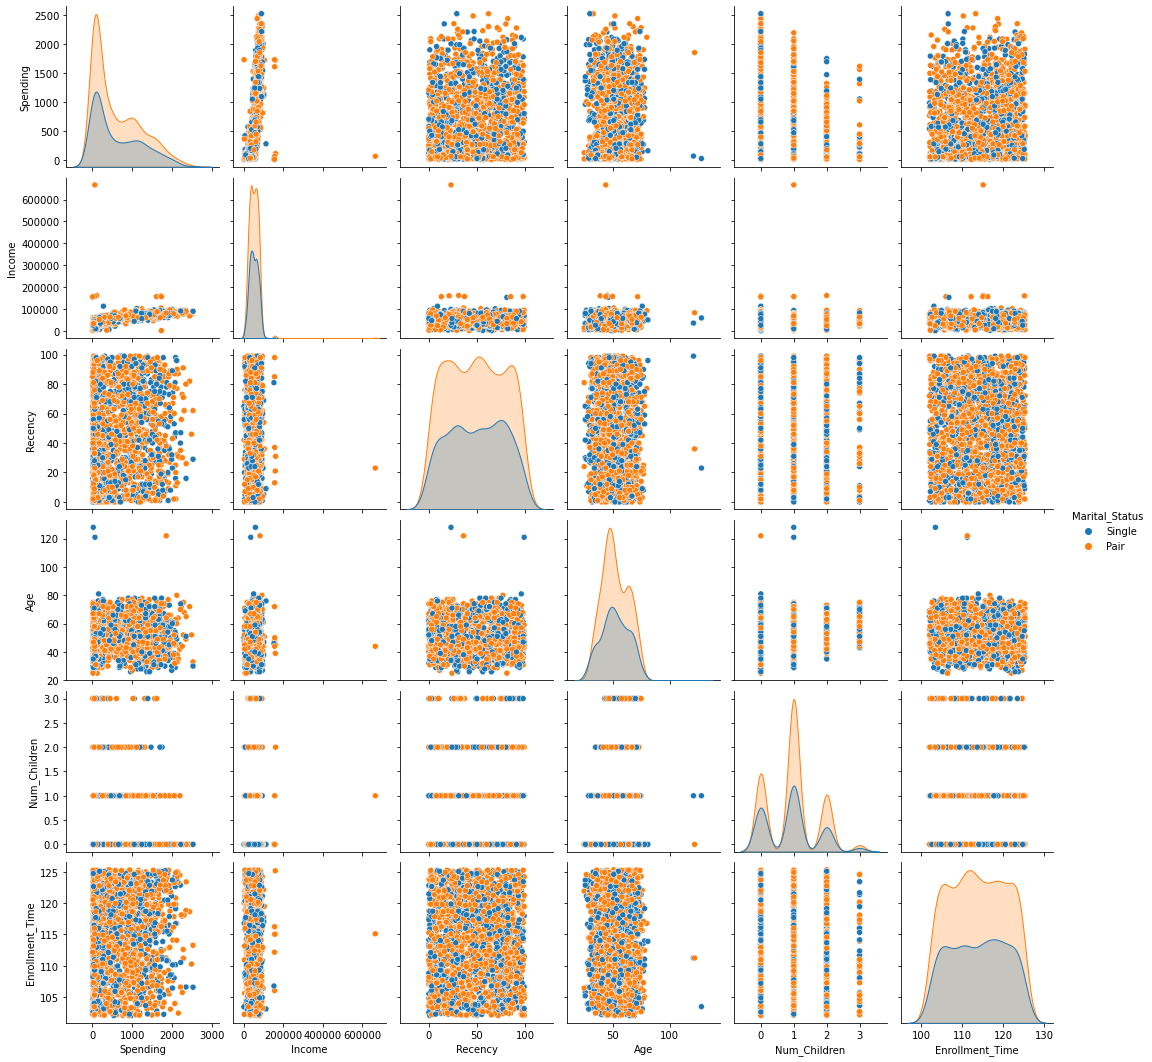

In [18]:
sns.pairplot(df[df_cat], hue="Marital_Status") 

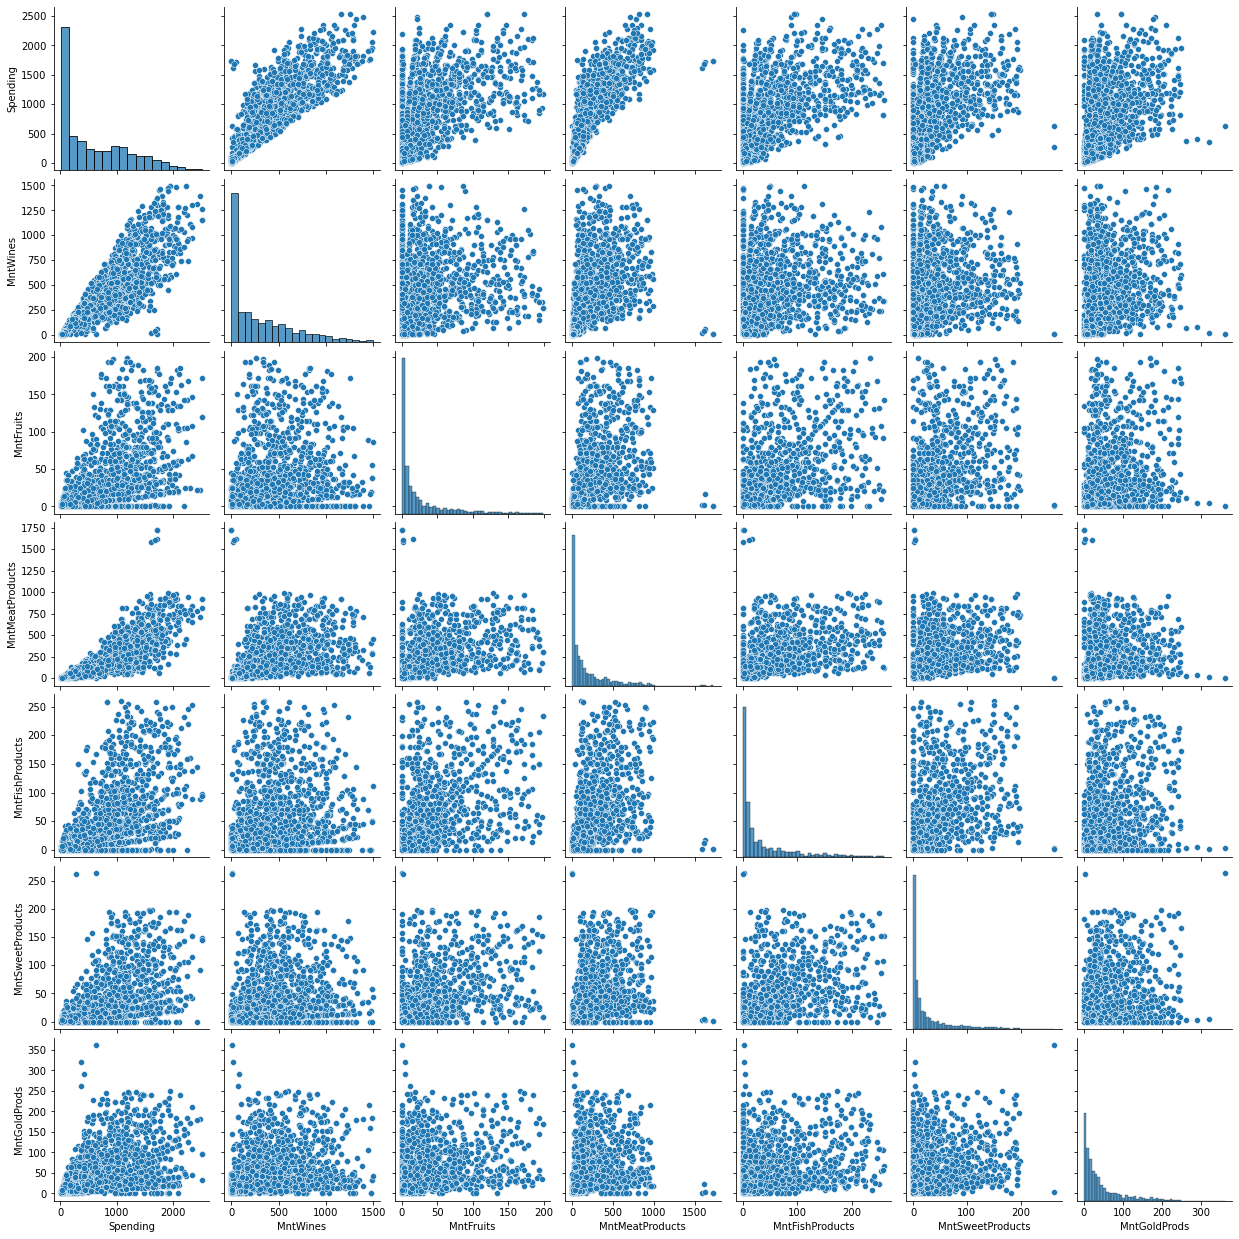

In [19]:
# Relationships between amount spent on different products (df_mnt)
sns.pairplot(df[df_mnt])

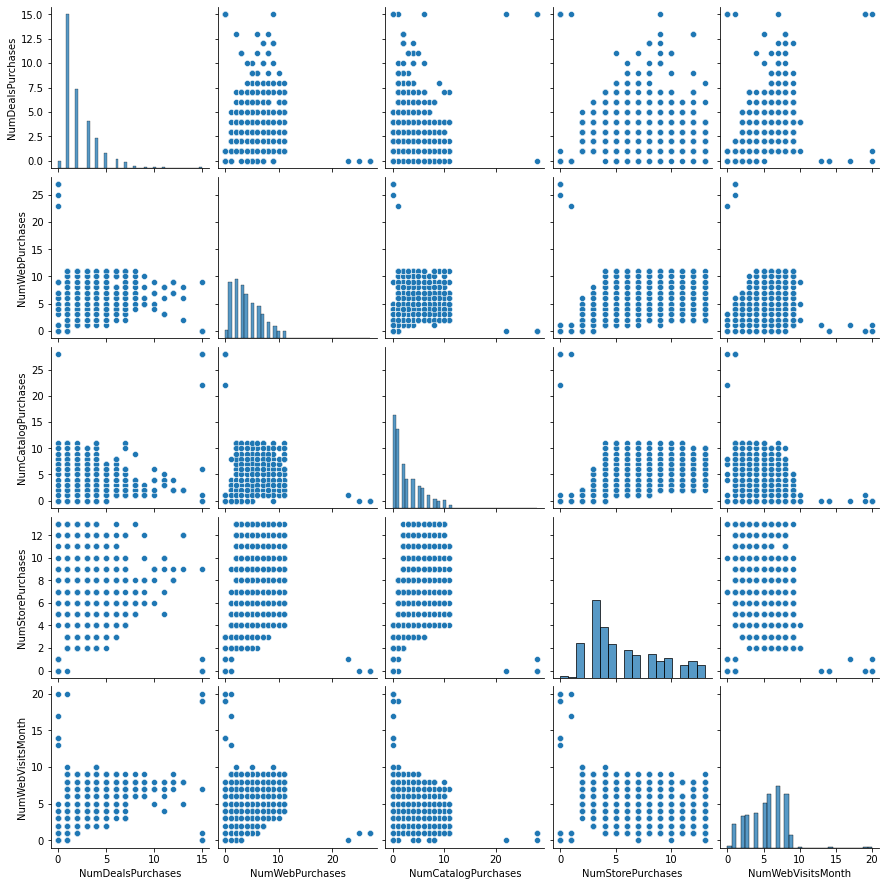

In [20]:
# Relationships between number of purchases in different locations (df_num)
sns.pairplot(df[df_place])

Text(0.5, 1.0, 'Education Level Distribution')

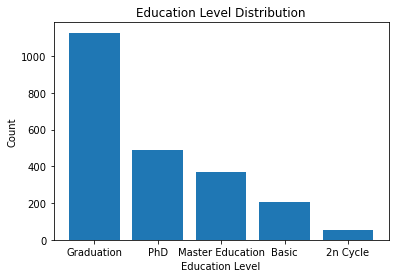

In [21]:
# Distribution plots

# Bar plot for education level (education level distribution)
# bar method1:
plt.bar(["Graduation","PhD","Master Education","Basic","2n Cycle"], df.Education.value_counts())
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Customer Education Level'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Education Level')]

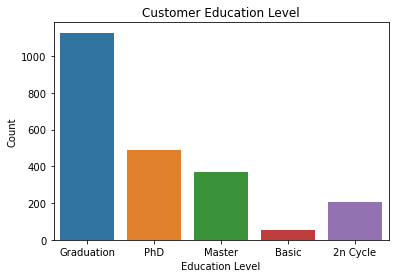

In [22]:
# bar method2:
sns.countplot(df.Education).set(title="Customer Education Level", ylabel="Count", xlabel="Education Level")

Text(0.5, 1.0, 'Age Distribution')

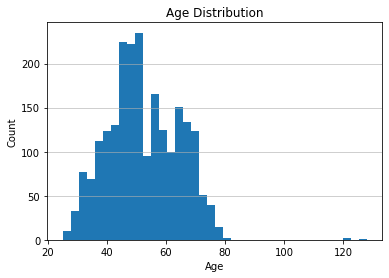

In [23]:
# Hist plot for customer ages (potential outliers)
# hist method1
plt.hist(df.Age, bins='auto')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

[Text(0.5, 1.0, 'Customer Age')]

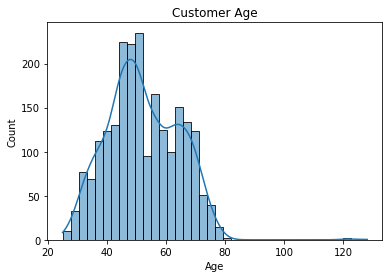

In [24]:
# hist method2
sns.histplot(df.Age, kde=True).set(title="Customer Age")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Customer Marital Status')]

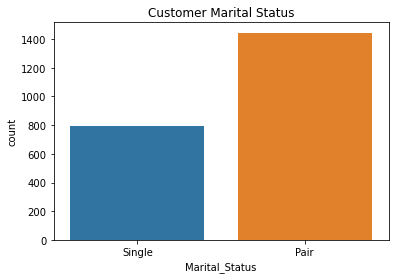

In [25]:
# Bar plot for marital status
sns.countplot(df.Marital_Status).set(title="Customer Marital Status")

[Text(0.5, 1.0, 'Customer Income')]

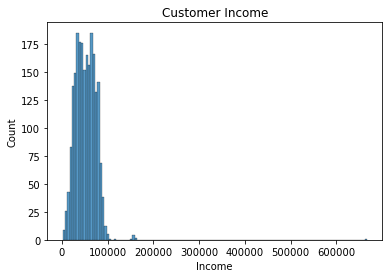

In [26]:
# Hist plot for income (potential outliers)
sns.histplot(df.Income).set(title="Customer Income")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Number of Children at Home')]

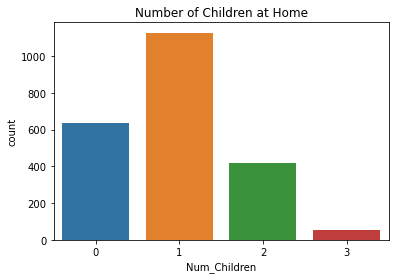

In [27]:
# Bar plot for number of children at home
sns.countplot(df.Num_Children).set(title="Number of Children at Home")

[Text(0.5, 1.0, 'Customer Spending')]

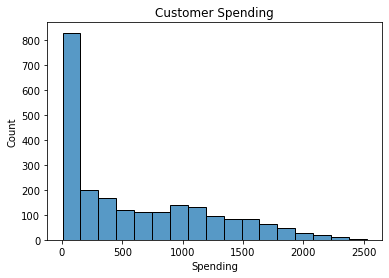

In [28]:
# Hist plot for product purchases
sns.histplot(df.Spending).set(title="Customer Spending")

[Text(0.5, 1.0, 'Purchase Products')]

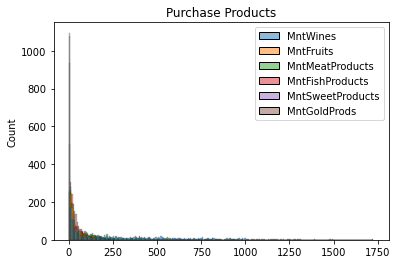

In [29]:
df_mnt_2 = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"] # remove total spending from df_mnt
sns.histplot(df[df_mnt_2]).set(title="Purchase Products")

[Text(0.5, 1.0, 'Purchase Place')]

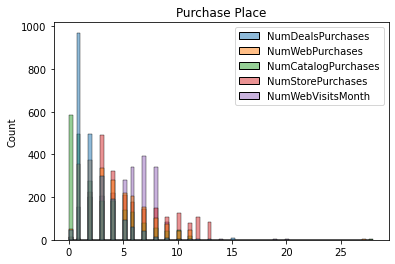

In [30]:
# Hist plot for places of purchase
sns.histplot(df[df_place]).set(title="Purchase Place")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Customer Response')]

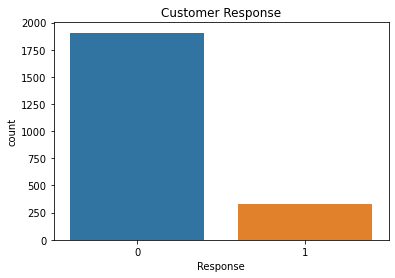

In [31]:
# Bar plot for response
sns.countplot(df.Response).set(title="Customer Response")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Customer Complains')]

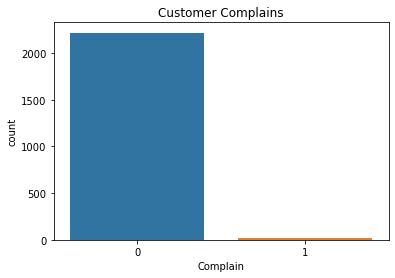

In [32]:
# Bar plot for number of complains
sns.countplot(df.Complain).set(title="Customer Complains")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Number of Purchases with Discount')]

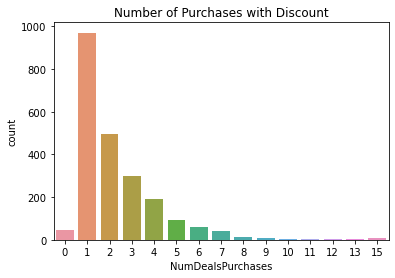

In [33]:
# Bar plot: # of purchases made with a discount
sns.countplot(df.NumDealsPurchases).set(title="Number of Purchases with Discount")

[Text(0.5, 1.0, 'Customer Enrollment Time')]

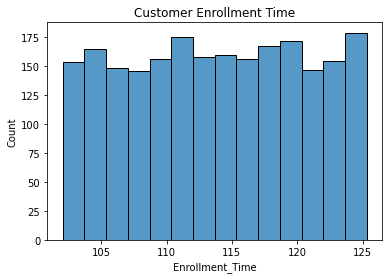

In [34]:
# Hist plot for customer enrollment time with company
sns.histplot(df.Enrollment_Time).set(title="Customer Enrollment Time")

[Text(0.5, 1.0, 'Total Spending by Income')]

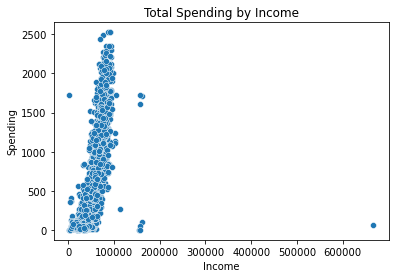

In [35]:
# Scatter plots

# Relationship between total spending and income
sns.scatterplot(x=df.Income,y=df.Spending).set(title="Total Spending by Income")

[Text(0.5, 1.0, 'Total Spending by Age')]

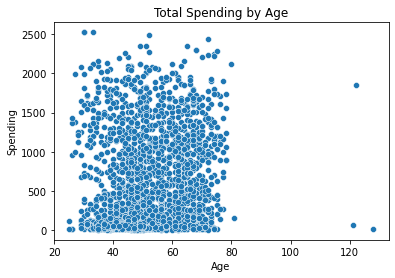

In [37]:
# Relationship between total spending and age
sns.scatterplot(x=df.Age,y=df.Spending).set(title="Total Spending by Age")

[Text(0.5, 1.0, 'Total Spending by Education Level')]

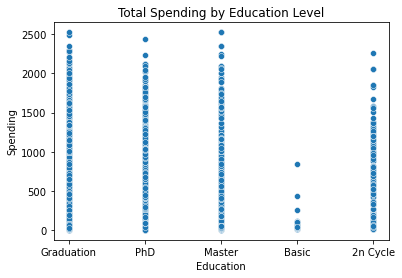

In [36]:
# Relationship between total spending and education level
sns.scatterplot(x=df.Education,y=df.Spending).set(title="Total Spending by Education Level")

[Text(0.5, 1.0, 'Total Spending by Marital Status')]

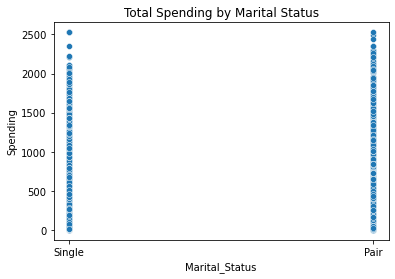

In [38]:
# Relationship between total spending and marital status
sns.scatterplot(x=df.Marital_Status,y=df.Spending).set(title="Total Spending by Marital Status")

[Text(0.5, 1.0, 'Total Spending by Number of Children')]

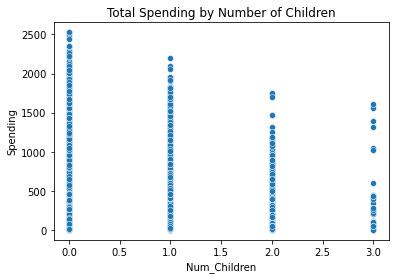

In [39]:
# Relationship between total spending and number of children
sns.scatterplot(x=df.Num_Children,y=df.Spending).set(title="Total Spending by Number of Children")

[Text(0.5, 1.0, 'Total Spending by Enrollment Time')]

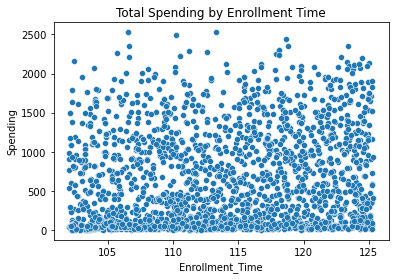

In [40]:
# Relationship between total spending and customer enrillment time
sns.scatterplot(x=df.Enrollment_Time,y=df.Spending).set(title="Total Spending by Enrollment Time")

In [41]:
### Part2 Data Preparation ###

## Data Cleaning ##

# check missingness
df.isnull().sum()
# 24 missing values in Income

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Spending                0
Age                     0
Num_Children            0
Enrollment_Time         0
dtype: int64

In [42]:
# Drop N/A's if any
df = df.dropna()
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,1617,64,0,124.133333
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,27,67,2,105.800000
2,Graduation,Pair,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,776,56,0,112.433333
3,Graduation,Pair,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,53,37,1,106.666667
4,PhD,Pair,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,422,40,1,107.400000


<AxesSubplot:title={'center':'Age'}, xlabel='Education'>

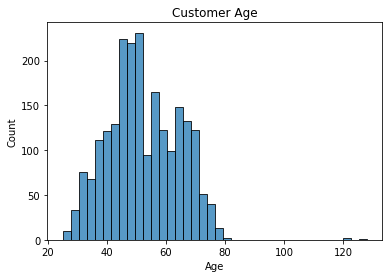

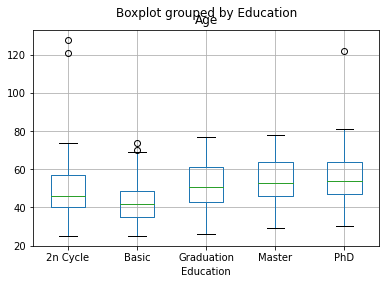

In [43]:
# Find Outliers

# hist plot and box plot for Age
sns.histplot(df.Age).set(title="Customer Age")
df.boxplot(column = ["Age"], by = "Education")
# => 3 people aged > 120 thus there at least 3 outliers

<AxesSubplot:title={'center':'Income'}, xlabel='Education'>

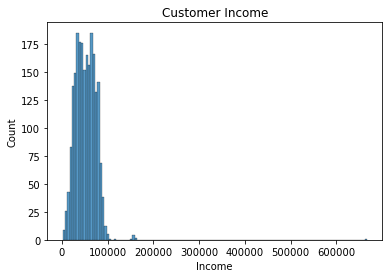

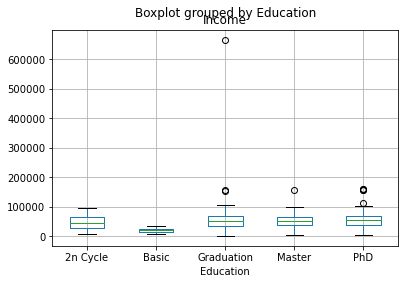

In [44]:
# hist plot and box plot for Income
sns.histplot(df.Income).set(title="Customer Income")
df.boxplot(column = ["Income"], by = "Education")
# => at least one outlier > 600000, far more than the others

In [45]:
IQR_Income = df.Income.quantile(0.75)-df.Income.quantile(0.25)
d1 = df.Income.quantile(0.25) - 1.5*IQR_Income # negative
d2 = df.Income.quantile(0.75) + 1.5*IQR_Income # d2 = 118350.5
# In out data set, Income > 118350.5 => outliers

In [47]:
IQR_Age = df.Age.quantile(0.75)-df.Age.quantile(0.25)
d3 = df.Age.quantile(0.25) - 1.5*IQR_Age # 17
d4 = df.Age.quantile(0.75) + 1.5*IQR_Age # 89
# Age < 17 or Age > 89 => outliers
# df.Age.desribe()
# Minimum age is 25 > 17, thus in our data set Age > 89 are outliers

In [48]:
# Remove Outliers from Income and Age
df = df[(df.Age<89)]
df = df[(df.Income<118350.5)]

In [49]:
# Encode categorical features into numeric features in df_mod #

# First we create a copy called df_mod, and will do encoding, scaling and modelling in this copy
df_mod = df.copy()

In [50]:
cat2 = (df_mod.dtypes == "object")
cat2_cols = list(cat2[cat2].index)

In [51]:
# for k-medoids, create a dataframe that includes categorical data
df_gower=df_mod.copy()
df_gower = df_gower.drop("Response",1)
#df_gower = df_gower.drop("AcceptedCmp1",1)
#df_gower = df_gower.drop("AcceptedCmp2",1)
#df_gower = df_gower.drop("AcceptedCmp3",1)
#df_gower = df_gower.drop("AcceptedCmp4",1)
#df_gower = df_gower.drop("AcceptedCmp5",1)

C:\Users\hp\AppData\Local\Temp\ipykernel_2284\584478320.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gower = df_gower.drop("Response",1)


In [53]:
# cat2_cols provide a list of categorical features: Education, Marital_Status
# Encode them to numeric features:
LE=LabelEncoder()
for i in cat2_cols:
    df_mod[i]=df_mod[[i]].apply(LE.fit_transform)

df_mod[cat_cols].head()
# 2n Cycle = 0, Basic = 1, Graduation = 2, Master = 3, PhD = 4
# Pair = 0, Single = 1
# df_mod: Education, Marital_Status are now numerical features

,Education,Marital_Status
0,2,1
1,2,1
2,2,0
3,2,0
4,4,0


In [54]:
# Drop categorical variables
df_non_cat = df_mod.drop(["Education","Marital_Status"],1)
df_ncat_data = df_non_cat.drop("Response",1)
df_ncat_data = df_ncat_data.drop("AcceptedCmp1",1)
df_ncat_data = df_ncat_data.drop("AcceptedCmp2",1)
df_ncat_data = df_ncat_data.drop("AcceptedCmp3",1)
df_ncat_data = df_ncat_data.drop("AcceptedCmp4",1)
df_ncat_data = df_ncat_data.drop("AcceptedCmp5",1)

C:\Users\hp\AppData\Local\Temp\ipykernel_2284\2980338131.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_non_cat = df_mod.drop(["Education","Marital_Status"],1)
C:\Users\hp\AppData\Local\Temp\ipykernel_2284\2980338131.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ncat_data = df_non_cat.drop("Response",1)
C:\Users\hp\AppData\Local\Temp\ipykernel_2284\2980338131.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ncat_data = df_ncat_data.drop("AcceptedCmp1",1)
C:\Users\hp\AppData\Local\Temp\ipykernel_2284\2980338131.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ncat_data = df_ncat_data.drop("AcceptedCmp2",1)
C:\Use

In [55]:

# Drop the responses
df_data=df_mod.copy()
#df_data = df_mod.drop("Response",1)
#df_data = df_data.drop("AcceptedCmp1",1)
#df_data = df_data.drop("AcceptedCmp2",1)
#df_data = df_data.drop("AcceptedCmp3",1)
#df_data = df_data.drop("AcceptedCmp4",1)
#df_data = df_data.drop("AcceptedCmp5",1)

In [56]:
# Scaling #
scaler = MinMaxScaler()
scaler.fit(df_ncat_data)
df_ncat_t = scaler.transform(df_ncat_data)

In [57]:
scaler = MinMaxScaler()
scaler.fit(df_data)
df_t = scaler.transform(df_data)

In [ ]:
# All features are now scaled in df_t and ready for future modelling


## Feature Engineering ##
# See EDA - Processing:
# features removed: ID, Z_CostContact, Z_Revenue, Dt_Customer
# features added: Spending, Age, Num_Children, Enrollment_Time

In [2]:
### Part3 Modeling ###
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## K-mean ##

# test with different number of clusters to find the best one
test_score = []
for i in range(1,10):
    kmean = KMeans(n_clusters = i,
        n_init = 10,
        init = 'k-means++',
        max_iter = 300,
        random_state = 147)
    kmean.fit(df_ncat_t)
    test_score.append(kmean.inertia_)

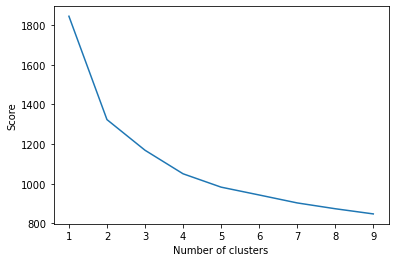

In [3]:
#draw the plot and find the Elbow Point
plt.plot(range(1,10),test_score)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
#it seems that n=4 is the Elbow Point
cluster_number = 4

In [4]:
#fit the K-mean model with 4 clusters
kmean = KMeans(n_clusters = cluster_number,
        n_init = 10,
        init = 'k-means++',
        max_iter = 300,
        random_state = 147)
kmean.fit(df_ncat_t)

# store the lable for comparison
kmean_labels = kmean.labels_

In [5]:
#add the k-mean cluster to the dataframe
df_mod["K_mean"] = kmean_labels
Counter(kmean_labels)

Counter({2: 547, 3: 522, 0: 611, 1: 525})

In [6]:
df_mod.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time,K_mean
0,2,1,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,1617,64,0,112.700000,2
1,2,1,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,27,67,2,94.366667,3
2,2,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,776,56,0,101.000000,2
3,2,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,37,1,95.233333,0
4,4,0,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,40,1,95.966667,0


In [7]:
#abstract clusters from k mean
cluster0_K=df_mod[df_mod.K_mean==0]
cluster1_K=df_mod[df_mod.K_mean==1]
cluster2_K=df_mod[df_mod.K_mean==2]
cluster3_K=df_mod[df_mod.K_mean==3]

In [8]:
cluster0_K

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time,K_mean
3,2,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,37,1,95.233333,0
4,4,0,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,40,1,95.966667,0
7,4,0,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,0,169,36,1,104.500000,0
8,4,0,30351.0,1,0,19,14,0,24,3,...,0,0,0,0,1,46,47,1,103.533333,0
11,1,0,7500.0,0,0,59,6,16,11,11,...,0,0,0,0,0,61,45,0,110.366667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,0,0,7500.0,1,0,7,2,8,11,3,...,0,0,0,0,0,53,42,1,104.533333,0
2229,2,0,24434.0,2,0,9,3,2,8,20,...,0,0,0,0,0,50,49,2,92.000000,0
2230,2,1,11012.0,1,0,82,24,3,26,7,...,0,0,0,0,0,84,37,1,106.266667,0
2232,2,1,26816.0,0,0,50,5,1,6,3,...,0,0,0,0,0,22,35,0,113.300000,0


In [9]:
cluster0_Knum=cluster0_K['Response'].sum()
cluster1_Knum=cluster1_K['Response'].sum()
cluster2_Knum=cluster2_K['Response'].sum()
cluster3_Knum=cluster3_K['Response'].sum()

In [10]:
#the amount of data that response = 1 in cluster 0
cluster0_Knum

73

In [11]:
#the amount of data that response = 1 in cluster 1
cluster1_Knum

59

In [12]:
#the amount of data that response = 1 in cluster 2
cluster2_Knum

161

In [13]:
#the amount of data that response = 1 in cluster 3
cluster3_Knum

40

In [14]:
#the proportion of data that response =1 in cluster 0
cluster0_Knum/611

0.11947626841243862

In [15]:
#the proportion of data that response =1 in cluster 1
cluster1_Knum/525

0.11238095238095239

In [16]:
#the proportion of data that response =1 in cluster 2
cluster2_Knum/547

0.2943327239488117

In [17]:
#the proportion of data that response =1 in cluster 1
cluster3_Knum/522

0.07662835249042145

In [18]:
#the proportion of data that response =1 in the whole data
df_mod['Response'].sum()/len(df_mod['Response'])

0.1510204081632653

From the calculation we can find a data in cluster 2 is more like to be response =1. Then we just need to analyze what is the difference between cluster 2 and the others.

<AxesSubplot:title={'center':'Enrollment_Time'}, xlabel='[K_mean]'>

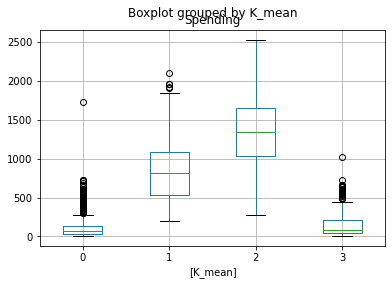

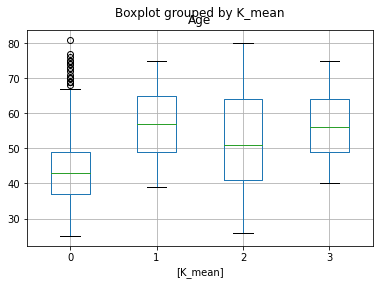

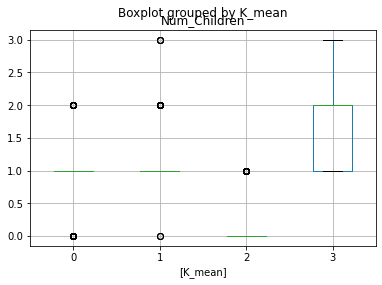

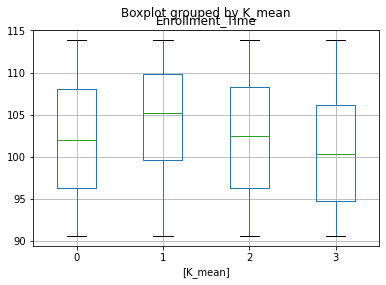

In [19]:
#plot some characteristics for each cluster
df_mod.boxplot(column = ["Spending"],by=["K_mean"])
df_mod.boxplot(column = ["Age"],by=["K_mean"])
df_mod.boxplot(column = ["Num_Children"],by=["K_mean"])
df_mod.boxplot(column = ["Enrollment_Time"],by=["K_mean"])

<AxesSubplot:title={'center':'MntGoldProds'}, xlabel='[K_mean]'>

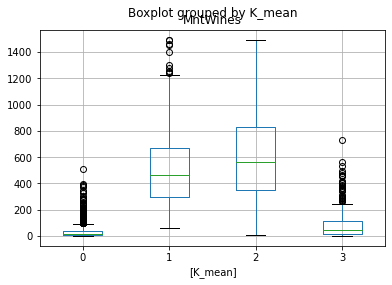

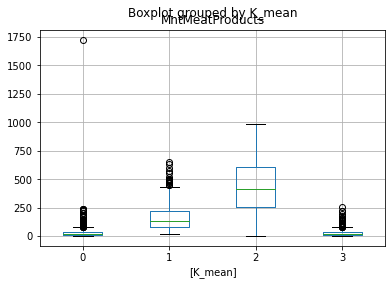

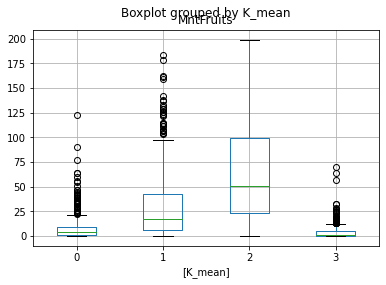

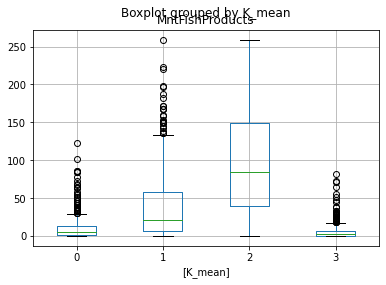

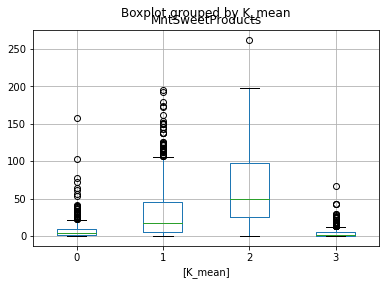

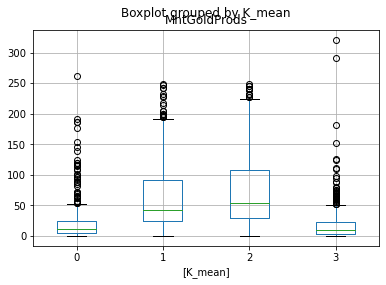

In [20]:
df_mod.boxplot(column = ["MntWines"],by=["K_mean"])
df_mod.boxplot(column = ["MntMeatProducts"],by=["K_mean"])
df_mod.boxplot(column = ["MntFruits"],by=["K_mean"])
df_mod.boxplot(column = ["MntFishProducts"],by=["K_mean"])
df_mod.boxplot(column = ["MntSweetProducts"],by=["K_mean"])
df_mod.boxplot(column = ["MntGoldProds"],by=["K_mean"])

<AxesSubplot:title={'center':'NumWebVisitsMonth'}, xlabel='[K_mean]'>

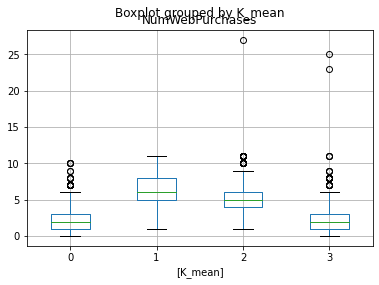

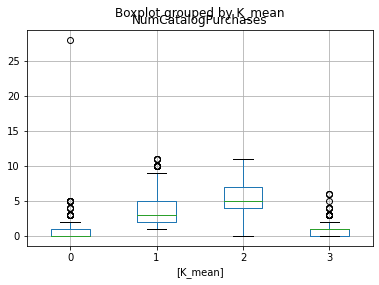

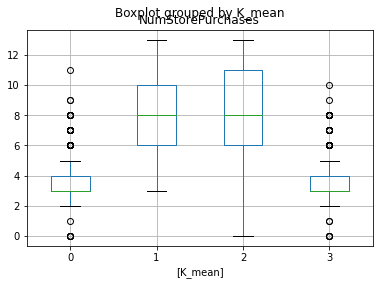

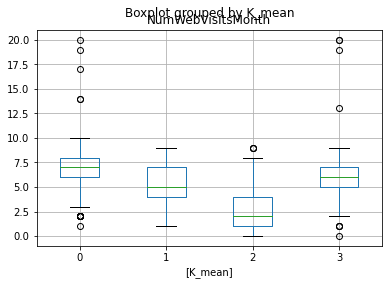

In [21]:
df_mod.boxplot(column = ["NumWebPurchases"],by=["K_mean"])
df_mod.boxplot(column = ["NumCatalogPurchases"],by=["K_mean"])
df_mod.boxplot(column = ["NumStorePurchases"],by=["K_mean"])
df_mod.boxplot(column = ["NumWebVisitsMonth"],by=["K_mean"])

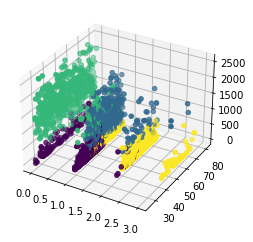

In [22]:
#draw a 3D plot
from mpl_toolkits import mplot3d
y = df_mod['Age']
z = df_mod['Spending']
x = df_mod['Num_Children']
c = df_mod['K_mean']

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c)

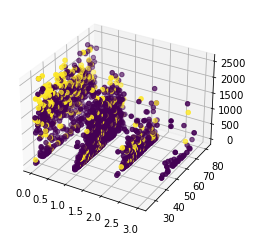

In [23]:
#draw a 3D plot with response
from mpl_toolkits import mplot3d
y = df_mod['Age']
z = df_mod['Spending']
x = df_mod['Num_Children']
c = df_mod['Response']

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c)

From the 3D plots we can find the cluster green(high spending, middle age, low Num_Children) are simmilar to the cluster 1(response =1).

First I will find the cluster that has the highest proportiion of members whose response = 1.

In [24]:
# Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = cluster_number,
                                     affinity = "euclidean",
                                     linkage = "ward")
agglom.fit(df_ncat_t)

# store the lable for comparison
agglom_labels = agglom.labels_

In [25]:
#add the Agglomerative Clustering cluster to the dataframe
df_mod["Agglom"] = agglom_labels
Counter(agglom_labels)

Counter({1: 540, 2: 452, 0: 857, 3: 356})

In [26]:
df_mod.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time,K_mean,Agglom
0,2,1,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,1617,64,0,112.700000,2,1
1,2,1,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,27,67,2,94.366667,3,2
2,2,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,776,56,0,101.000000,2,1
3,2,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,53,37,1,95.233333,0,0
4,4,0,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,422,40,1,95.966667,0,0


In [27]:
#abstract clusters from Agglom
cluster0_A=df_mod[df_mod.Agglom==0]
cluster1_A=df_mod[df_mod.Agglom==1]
cluster2_A=df_mod[df_mod.Agglom==2]
cluster3_A=df_mod[df_mod.Agglom==3]

In [28]:
cluster0_A

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spending,Age,Num_Children,Enrollment_Time,K_mean,Agglom
3,2,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,53,37,1,95.233333,0,0
4,4,0,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,422,40,1,95.966667,0,0
7,4,0,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,169,36,1,104.500000,0,0
8,4,0,30351.0,1,0,19,14,0,24,3,...,0,0,0,1,46,47,1,103.533333,0,0
11,1,0,7500.0,0,0,59,6,16,11,11,...,0,0,0,0,61,45,0,110.366667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4,1,57642.0,0,1,24,580,6,58,8,...,0,0,0,0,679,51,1,96.300000,1,0
2227,2,1,57967.0,0,1,39,229,7,137,4,...,0,0,0,0,468,59,1,106.700000,1,0
2230,2,1,11012.0,1,0,82,24,3,26,7,...,0,0,0,0,84,37,1,106.266667,0,0
2232,2,1,26816.0,0,0,50,5,1,6,3,...,0,0,0,0,22,35,0,113.300000,0,0


In [29]:
cluster0_Anum=cluster0_A['Response'].sum()
cluster1_Anum=cluster1_A['Response'].sum()
cluster2_Anum=cluster2_A['Response'].sum()
cluster3_Anum=cluster3_A['Response'].sum()

In [30]:
#the proportion of data that response =1 in cluster 0
cluster0_Anum/857

0.10035005834305717

In [31]:
#the proportion of data that response =1 in cluster 1
cluster1_Anum/540

0.30185185185185187

In [32]:
#the proportion of data that response =1 in cluster 2
cluster2_Anum/452

0.10398230088495575

In [33]:
#the proportion of data that response =1 in cluster 3
cluster3_Anum/356

0.10393258426966293

In [34]:
#the proportion of data that response =1 in the whole data
df_mod['Response'].sum()/len(df_mod['Response'])

0.1510204081632653

In [35]:
df_mod['Response'].sum()

333

From the calculation we can find a data in cluster 1 is more like to be response =1. Then we just need to analyze what is the difference between cluster 1 and the others.

<AxesSubplot:title={'center':'Enrollment_Time'}, xlabel='[Agglom]'>

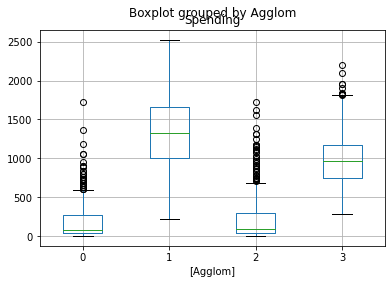

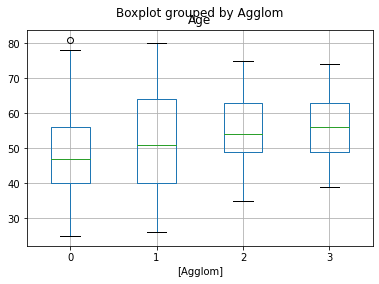

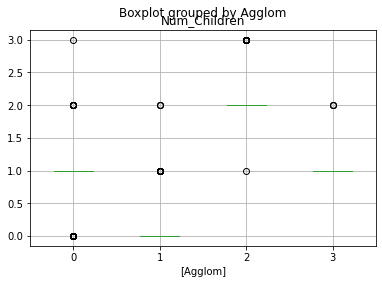

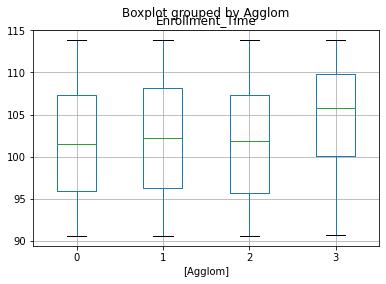

In [36]:
#plot some characteristics for each cluster
df_mod.boxplot(column = ["Spending"],by=["Agglom"])
df_mod.boxplot(column = ["Age"],by=["Agglom"])
df_mod.boxplot(column = ["Num_Children"],by=["Agglom"])
df_mod.boxplot(column = ["Enrollment_Time"],by=["Agglom"])

<AxesSubplot:title={'center':'MntGoldProds'}, xlabel='[Agglom]'>

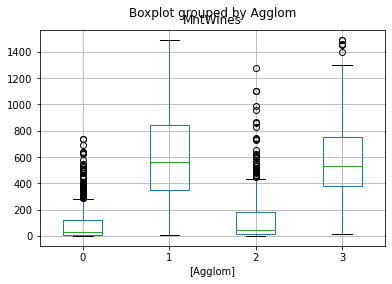

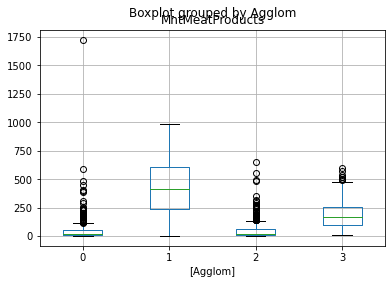

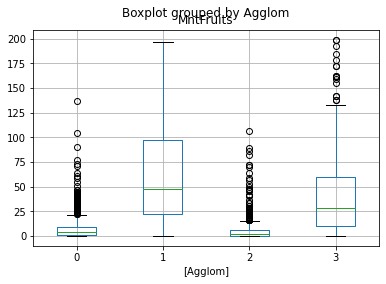

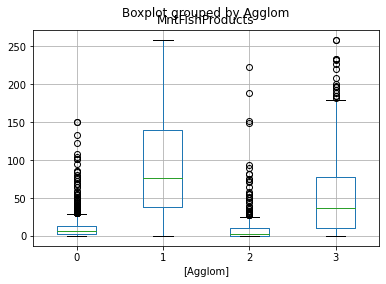

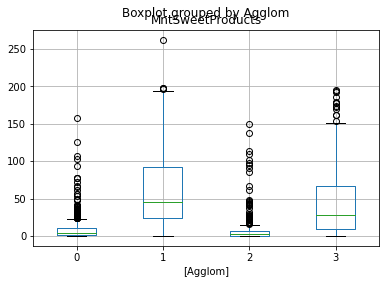

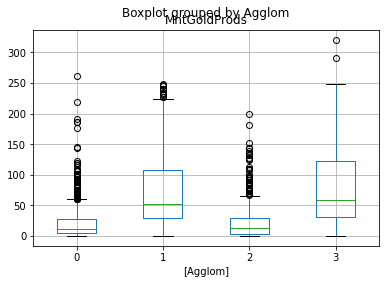

In [37]:
df_mod.boxplot(column = ["MntWines"],by=["Agglom"])
df_mod.boxplot(column = ["MntMeatProducts"],by=["Agglom"])
df_mod.boxplot(column = ["MntFruits"],by=["Agglom"])
df_mod.boxplot(column = ["MntFishProducts"],by=["Agglom"])
df_mod.boxplot(column = ["MntSweetProducts"],by=["Agglom"])
df_mod.boxplot(column = ["MntGoldProds"],by=["Agglom"])

<AxesSubplot:title={'center':'NumWebVisitsMonth'}, xlabel='[Agglom]'>

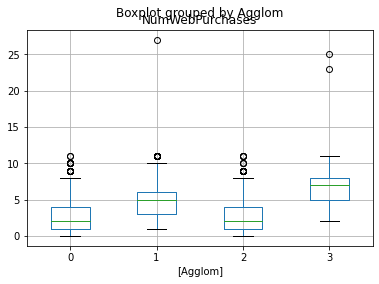

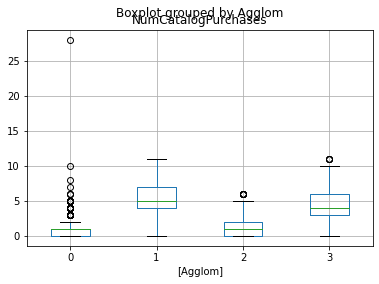

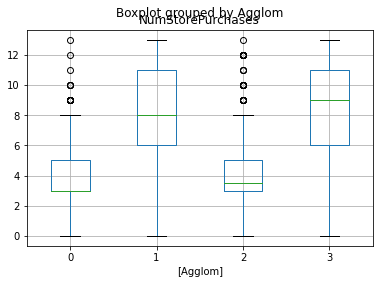

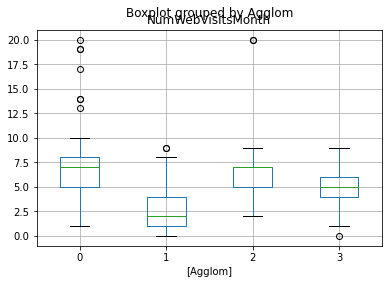

In [38]:
df_mod.boxplot(column = ["NumWebPurchases"],by=["Agglom"])
df_mod.boxplot(column = ["NumCatalogPurchases"],by=["Agglom"])
df_mod.boxplot(column = ["NumStorePurchases"],by=["Agglom"])
df_mod.boxplot(column = ["NumWebVisitsMonth"],by=["Agglom"])

<AxesSubplot:title={'center':'Agglom'}, xlabel='[K_mean]'>

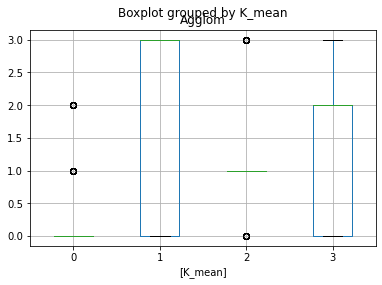

In [39]:
# compare K-mean with Agglomerative Clustering
df_mod.boxplot(column = ["Agglom"],by=["K_mean"])

<AxesSubplot:title={'center':'Response'}, xlabel='[Agglom]'>

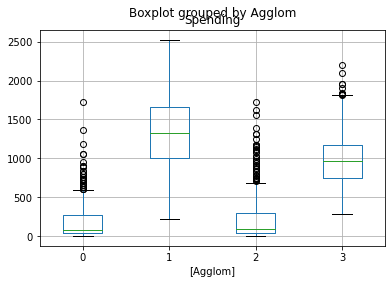

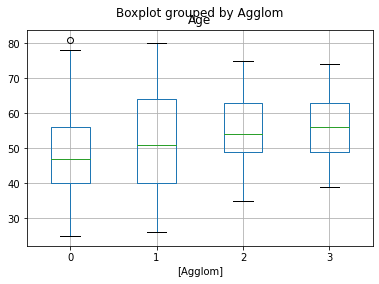

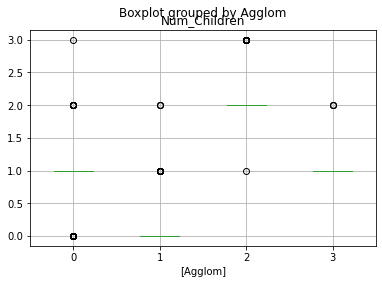

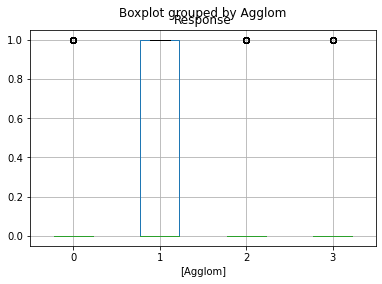

In [40]:
#plot some characteristics for each cluster
df_mod.boxplot(column = ["Spending"],by=["Agglom"])
df_mod.boxplot(column = ["Age"],by=["Agglom"])
df_mod.boxplot(column = ["Num_Children"],by=["Agglom"])
df_mod.boxplot(column = ["Response"],by=["Agglom"])

In [57]:
# K-Medoids method with distance metric = gower's distance
# this method is capable to include mix of categorical data and numerical data
import gower
from sklearn_extra.cluster import KMedoids
gower_matrix = gower.gower_matrix(df_gower,  cat_features = [True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False])
kmedoids = KMedoids(n_clusters = cluster_number,
                    init =  'k-medoids++',
                    metric = 'precomputed', 
                    method = 'pam', 
                    random_state = 147)
kmedoids.fit(gower_matrix)

KMedoids(init='k-medoids++', method='pam', metric='precomputed', n_clusters=4,
         random_state=147)

In [59]:
#add the K-Medoids cluster to the dataframe
kmedoids_labels = kmedoids.labels_
df_mod["K_medoids"] = kmedoids_labels
Counter(kmedoids_labels)

Counter({2: 575, 3: 457, 0: 718, 1: 455})

In [60]:
#abstract clusters from K-Medoids
cluster0_M=df_mod[df_mod.K_medoids==0]
cluster1_M=df_mod[df_mod.K_medoids==1]
cluster2_M=df_mod[df_mod.K_medoids==2]
cluster3_M=df_mod[df_mod.K_medoids==3]

In [61]:
cluster0_Mnum=cluster0_M['Response'].sum()
cluster1_Mnum=cluster1_M['Response'].sum()
cluster2_Mnum=cluster2_M['Response'].sum()
cluster3_Mnum=cluster3_M['Response'].sum()

In [62]:
#the proportion of data that response =1 in cluster 0
cluster0_Mnum/718

0.10167130919220056

In [63]:
#the proportion of data that response =1 in cluster 1
cluster1_Mnum/455

0.12967032967032968

In [64]:
#the proportion of data that response =1 in cluster 2
cluster2_Mnum/575

0.26956521739130435

In [65]:
#the proportion of data that response =1 in cluster 0
cluster3_Mnum/457

0.10065645514223195

<AxesSubplot:title={'center':'Enrollment_Time'}, xlabel='[K_medoids]'>

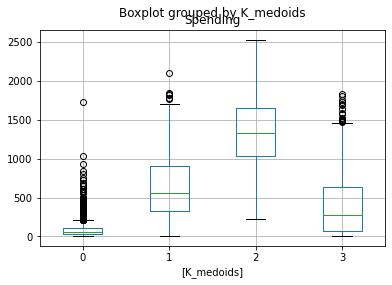

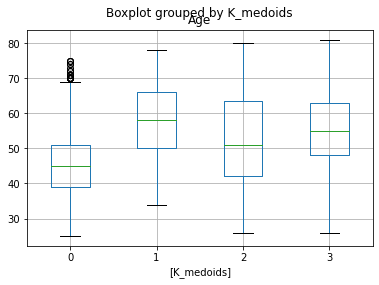

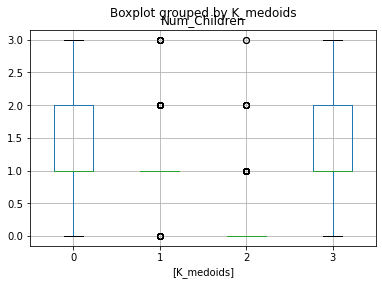

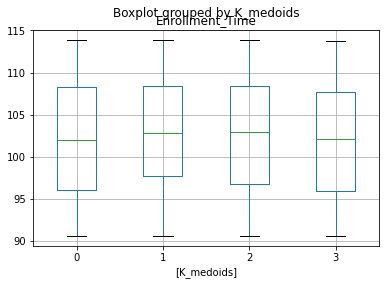

In [66]:
#plot some characteristics for each cluster
df_mod.boxplot(column = ["Spending"],by=["K_medoids"])
df_mod.boxplot(column = ["Age"],by=["K_medoids"])
df_mod.boxplot(column = ["Num_Children"],by=["K_medoids"])
df_mod.boxplot(column = ["Enrollment_Time"],by=["K_medoids"])

<AxesSubplot:title={'center':'AcceptedCmp2'}, xlabel='[K_medoids]'>

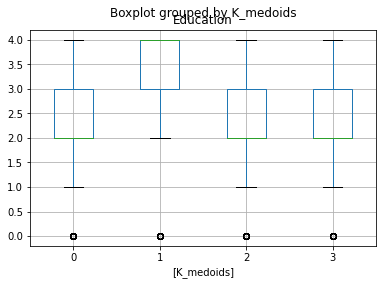

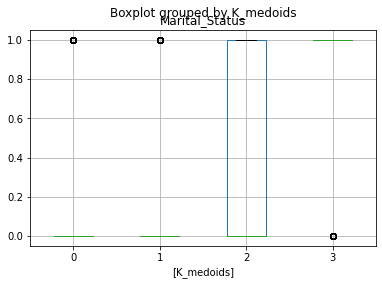

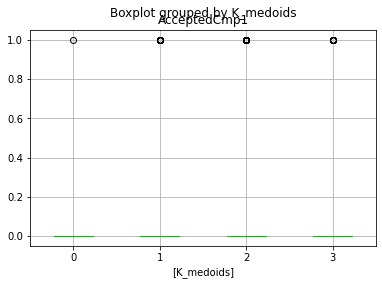

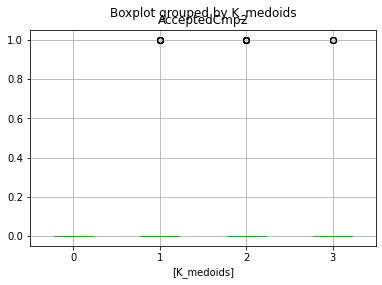

In [67]:
df_mod.boxplot(column = ["Education"],by=["K_medoids"])
df_mod.boxplot(column = ["Marital_Status"],by=["K_medoids"])
df_mod.boxplot(column = ["AcceptedCmp1"],by=["K_medoids"])
df_mod.boxplot(column = ["AcceptedCmp2"],by=["K_medoids"])

<AxesSubplot:title={'center':'AcceptedCmp5'}, xlabel='[K_medoids]'>

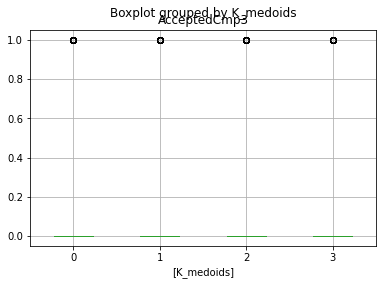

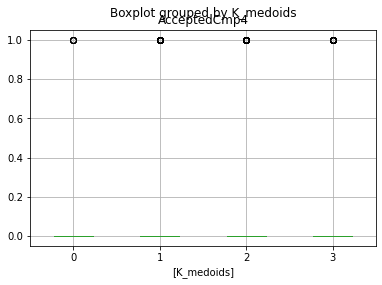

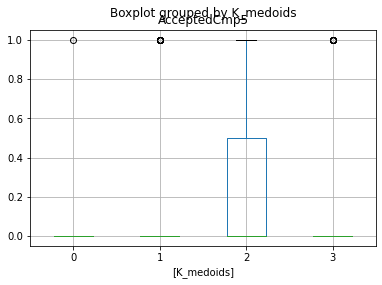

In [68]:
df_mod.boxplot(column = ["AcceptedCmp3"],by=["K_medoids"])
df_mod.boxplot(column = ["AcceptedCmp4"],by=["K_medoids"])
df_mod.boxplot(column = ["AcceptedCmp5"],by=["K_medoids"])
